In [58]:
import pandas as pd 
from glob import glob
import matplotlib.pyplot as plt

## Task 1: Merge All Csv files into one Data Frame

csv_files = glob('Sales*.csv.txt')

dataFrame = pd.DataFrame()


for files in csv_files:
    df = pd.read_csv(files)
    dataFrame = pd.concat([dataFrame, df])

dataFrame.to_csv('all_data.csv.txt', index=False)

# Task 2: what was the best month of sales, and how much was earn
 #cleaning all the data

dataFrame = dataFrame.dropna(axis = 0,how ='any') # drop the rows where whe have NaN Values
dataFrame = dataFrame.reset_index(drop =True) # reseting the index

dataFrame = dataFrame[dataFrame['Order Date'].str[0:2] != 'Or'] #For some reason cleaning the 'Or' that stay when i clean the data

dataFrame['Month'] = dataFrame['Order Date'].str[0:2] # setting up the new column
dataFrame['Month'] = dataFrame['Order Date'].str[0:2].astype('int32')



dataFrame.sort_values('Order Date')#ordering all the data by Month

dataFrame['Quantity Ordered'] = dataFrame['Quantity Ordered'].astype(float) #convert the quantity of string to float
dataFrame['Price Each'] = dataFrame['Price Each'].astype(float)# convert the Price of each product to float

dataFrame['Total Value'] = dataFrame['Quantity Ordered'] * dataFrame['Price Each'] # i create a new columns, sum of de the products

result = dataFrame.groupby(['Month']).sum() #ANSWER








0          2
1          2
2          2
3          2
4          2
          ..
186300    10
186301    10
186302    10
186303    10
186304    10
Name: Month, Length: 185950, dtype: int32

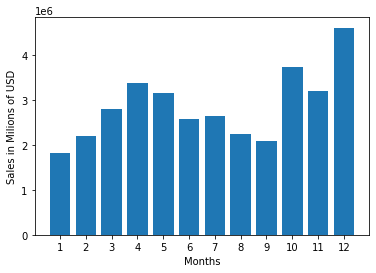

In [2]:
months = range(1,13)

plt.bar(months,result['Total Value'])
plt.xticks(months)
plt.ylabel('Sales in Milions of USD')
plt.xlabel('Months')
plt.show()


In [55]:
# Task 3: Find The city Wich have more sales

dataFrame['City'] = dataFrame['Purchase Address'].str.rsplit(',').str[-2] # creating a new column with de city

dataFrame['State'] = dataFrame['Purchase Address'].str.rsplit(',').str[-1]
dataFrame['State'] = dataFrame['State'].str[1:3]


orders = dataFrame.groupby(['City','State']).sum().sort_values('Quantity Ordered')

orders


,,Quantity Ordered,Price Each,Month,Total Value
City,State,,,,
Portland,ME,2750.0,4.471893e+05,17144,4.497583e+05
Austin,TX,11153.0,1.809874e+06,69829,1.819582e+06
Portland,OR,11303.0,1.860558e+06,70621,1.870732e+06
Seattle,WA,16553.0,2.733296e+06,104941,2.747755e+06
Atlanta,GA,16602.0,2.779908e+06,104794,2.795499e+06
Dallas,TX,16730.0,2.752628e+06,104620,2.767975e+06
Boston,MA,22528.0,3.637410e+06,141112,3.661642e+06
New York City,NY,27932.0,4.635371e+06,175741,4.664317e+06
Los Angeles,CA,33289.0,5.421435e+06,208325,5.452571e+06


In [74]:
#Task 3: What time should we display advertisements to maximize a likelihood of a customer's buying product?
dataFrame['Order Date'] = pd.to_datetime(dataFrame['Order Date']) #converting into a datetime object
dataFrame['Hour'] = dataFrame['Order Date'].dt.hour #adding a new columns named Hour
dataFrame['Minutes'] = dataFrame['Order Date'].dt.minute #adding a new columns named Minutes


In [72]:
dataFrame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value,Hour,Minites
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,1,35
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,7,24
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,9,46
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,16,47
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,20,32


In [81]:
best_hour = dataFrame.groupby(['Hour']).count()
best_hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value,Minites,Minutes
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
